In [1]:
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [7]:
data.corr(numeric_only=True)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.757793,0.851514,0.672764,0.619097,-0.032595,0.045545,0.014306,0.052086,0.148056,0.035464,-0.046333,0.489155,0.098180,0.273504,-0.105147
ybox,0.757793,1.000000,0.671912,0.823207,0.555067,0.045690,-0.040925,-0.025019,0.096478,0.159954,-0.054648,-0.007568,0.274431,-0.001336,0.230883,-0.042741
width,0.851514,0.671912,1.000000,0.660215,0.765716,0.061959,0.024832,-0.098611,0.057074,0.115018,0.011694,-0.045009,0.557251,0.045658,0.260285,-0.118273
height,0.672764,0.823207,0.660215,1.000000,0.644366,0.042844,-0.020072,0.082383,0.059032,0.012458,-0.011991,0.026386,0.265243,0.025359,0.297545,-0.018853
onpix,0.619097,0.555067,0.765716,0.644366,1.000000,0.139159,-0.028822,-0.011985,-0.065557,-0.069776,-0.072941,-0.038858,0.627507,0.017649,0.492653,-0.062969
xbar,-0.032595,0.045690,0.061959,0.042844,0.139159,1.000000,-0.356580,-0.053306,-0.122851,0.085963,-0.341957,-0.032115,0.144325,-0.253339,0.127056,0.248816
ybar,0.045545,-0.040925,0.024832,-0.020072,-0.028822,-0.356580,1.000000,-0.118625,-0.049658,0.178318,0.600397,-0.271649,-0.036722,0.555060,-0.078008,-0.207900
x2bar,0.014306,-0.025019,-0.098611,0.082383,-0.011985,-0.053306,-0.118625,1.000000,-0.188431,-0.317780,0.042545,0.082020,0.142132,-0.084820,0.006546,0.182902
y2bar,0.052086,0.096478,0.057074,0.059032,-0.065557,-0.122851,-0.049658,-0.188431,1.000000,0.132000,-0.060116,0.119048,-0.384018,-0.052545,0.277540,-0.061335
xybar,0.148056,0.159954,0.115018,0.012458,-0.069776,0.085963,0.178318,-0.317780,0.132000,1.000000,0.057988,-0.106759,-0.175676,0.029419,-0.087019,-0.114223


In [8]:
data.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [9]:
duplicates = data.duplicated()
duplicates.value_counts()

,count
False,18668
True,1332


In [11]:
data1 = data.drop_duplicates(keep=False)

In [12]:
duplicates = data1.duplicated()
duplicates.value_counts()

,count
False,17823


In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17823 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  17823 non-null  object
 1   xbox    17823 non-null  int64 
 2   ybox    17823 non-null  int64 
 3   width   17823 non-null  int64 
 4   height  17823 non-null  int64 
 5   onpix   17823 non-null  int64 
 6   xbar    17823 non-null  int64 
 7   ybar    17823 non-null  int64 
 8   x2bar   17823 non-null  int64 
 9   y2bar   17823 non-null  int64 
 10  xybar   17823 non-null  int64 
 11  x2ybar  17823 non-null  int64 
 12  xy2bar  17823 non-null  int64 
 13  xedge   17823 non-null  int64 
 14  xedgey  17823 non-null  int64 
 15  yedge   17823 non-null  int64 
 16  yedgex  17823 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.4+ MB


In [14]:
data2= data1.copy()

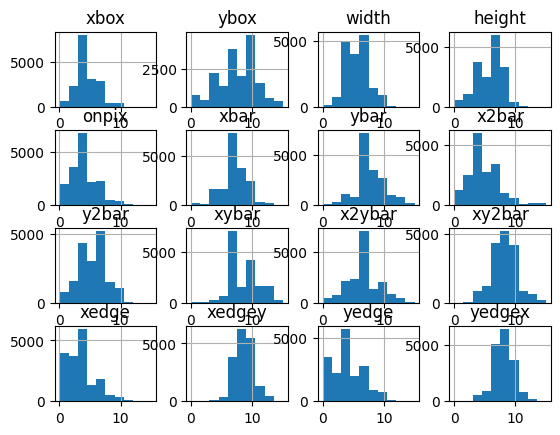

In [15]:
data2.hist()
plt.rcParams.update({'figure.figsize':(25,12), 'figure.dpi':100})

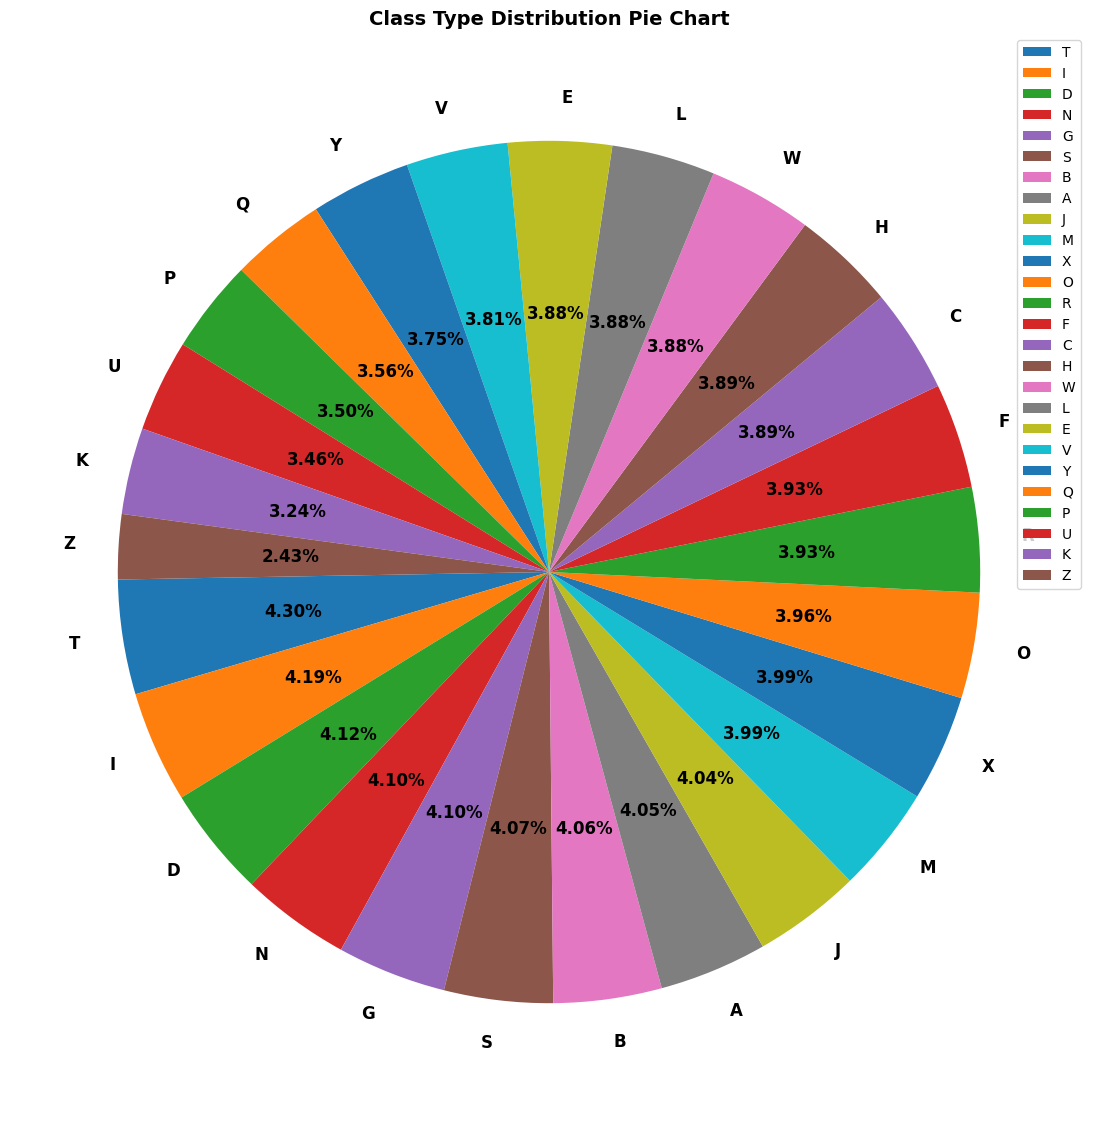

In [16]:
plt.figure(figsize=(14, 14))
plt.pie(data2['letter'].value_counts(), labels=data2.letter.unique(),
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

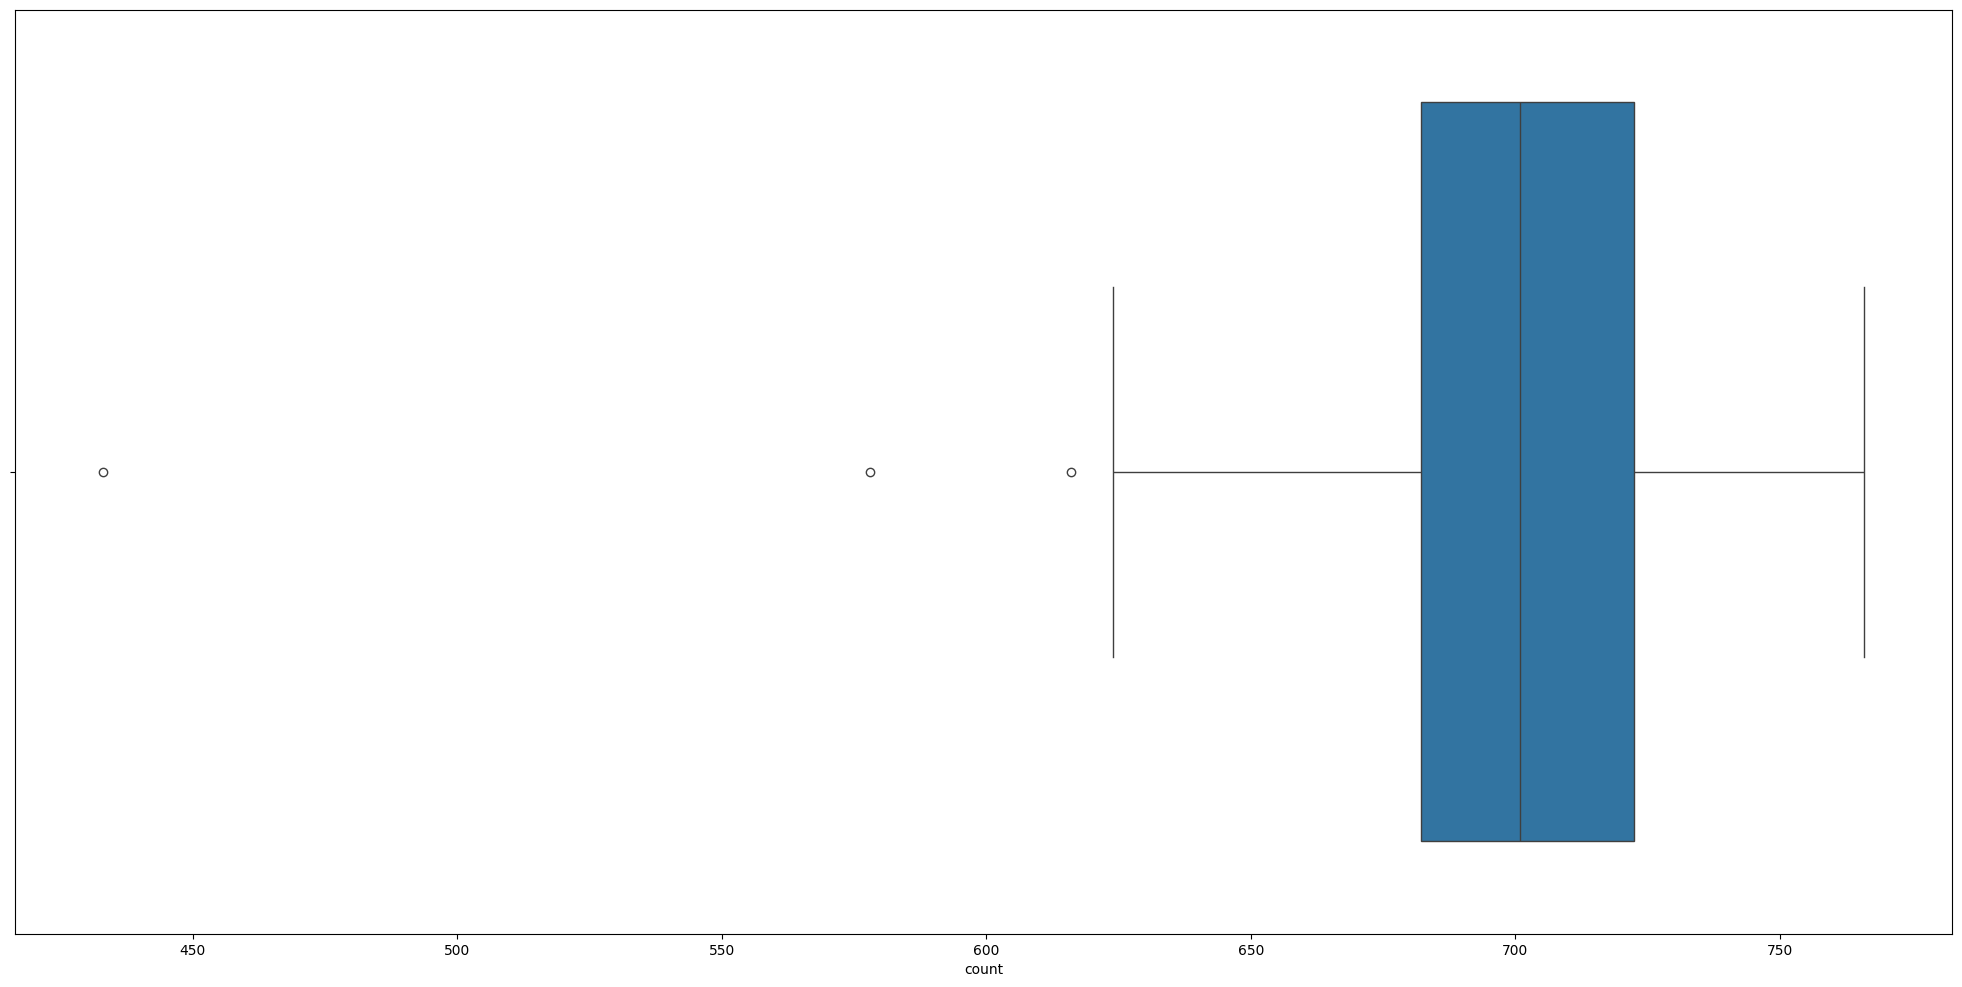

In [17]:
df = data2.letter.value_counts()
sns.boxplot(x=df)
plt.show()

In [19]:
correlation = data2.select_dtypes(include=np.number).corr()
correlation.style.background_gradient(cmap='BrBG')

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.748362,0.829605,0.642565,0.564778,-0.045073,0.028631,0.008651,0.029206,0.129227,0.031936,-0.044722,0.463695,0.092861,0.234572,-0.092619
ybox,0.748362,1.000000,0.646118,0.790499,0.507386,0.042840,-0.066102,-0.011138,0.066627,0.143203,-0.062478,-0.003794,0.252424,-0.011400,0.205421,-0.023210
width,0.829605,0.646118,1.000000,0.633211,0.734424,0.052838,-0.003471,-0.113744,0.028595,0.071276,-0.001380,-0.044686,0.543630,0.032223,0.209588,-0.106519
height,0.642565,0.790499,0.633211,1.000000,0.619714,0.043178,-0.034951,0.105662,0.012821,-0.017613,-0.009866,0.032764,0.239550,0.022680,0.286599,0.001244
onpix,0.564778,0.507386,0.734424,0.619714,1.000000,0.135631,-0.058017,-0.001888,-0.112586,-0.137996,-0.083302,-0.037891,0.627283,0.008410,0.481452,-0.047676
xbar,-0.045073,0.042840,0.052838,0.043178,0.135631,1.000000,-0.421802,-0.053796,-0.130721,0.035193,-0.406691,-0.051058,0.135094,-0.263116,0.126349,0.265455
ybar,0.028631,-0.066102,-0.003471,-0.034951,-0.058017,-0.421802,1.000000,-0.104648,-0.049344,0.138924,0.594260,-0.292967,-0.057382,0.566385,-0.108417,-0.213899
x2bar,0.008651,-0.011138,-0.113744,0.105662,-0.001888,-0.053796,-0.104648,1.000000,-0.146324,-0.303226,0.039747,0.091489,0.094805,-0.075381,0.052937,0.187719
y2bar,0.029206,0.066627,0.028595,0.012821,-0.112586,-0.130721,-0.049344,-0.146324,1.000000,0.120306,-0.043088,0.117797,-0.384926,-0.061405,0.214748,-0.061871
xybar,0.129227,0.143203,0.071276,-0.017613,-0.137996,0.035193,0.138924,-0.303226,0.120306,1.000000,0.031690,-0.128413,-0.212275,0.020065,-0.147920,-0.104298


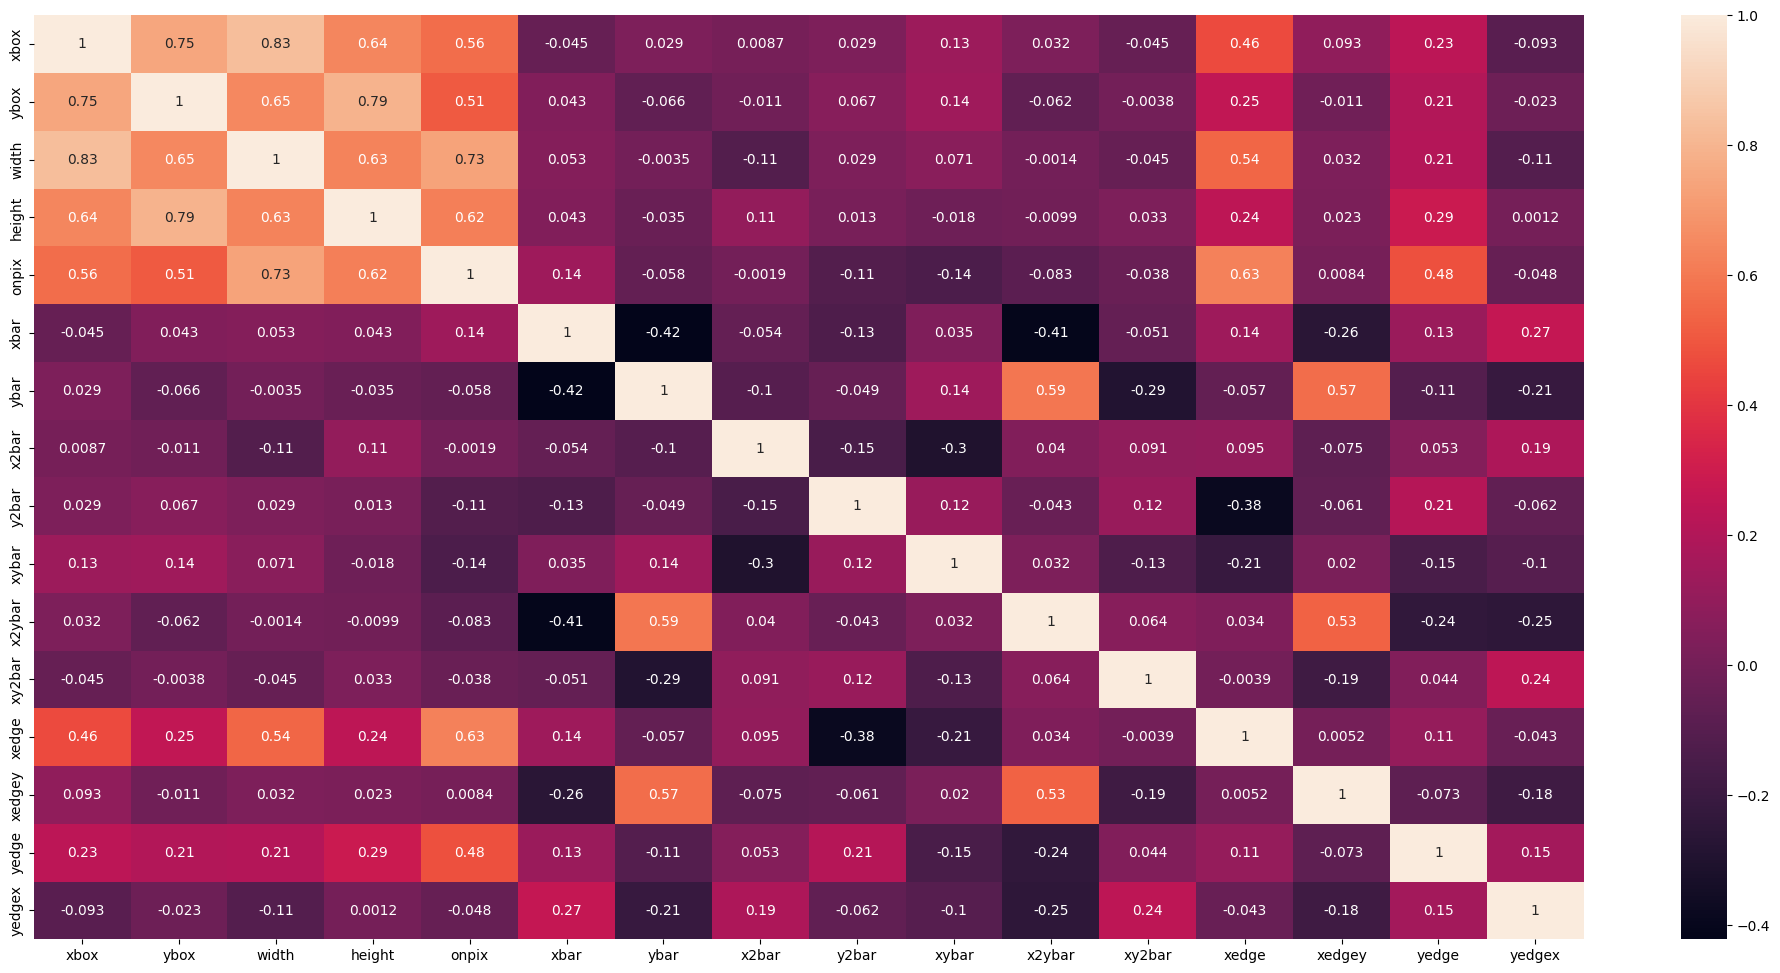

In [20]:
data2 = np.random.randint(low=1,
                         high=100,
                         size=(10, 10))
# plotting the heatmap
hm = sns.heatmap(data=correlation,
                annot=True)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

# displaying the plotted heatmap
plt.show()

In [21]:
from sklearn import preprocessing

# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'letters'.
data1['letter']= label_encoder.fit_transform(data1['letter'])

data1['letter'].unique()

<ipython-input-21-8732cd2a233d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['letter']= label_encoder.fit_transform(data1['letter'])


array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11,  4, 21, 24, 16, 15, 20, 10, 25])

In [22]:

x = data1.drop('letter',
               axis = 1)
y = data1['letter']

In [23]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [24]:
y

,letter
0,19
1,8
2,3
3,13
4,6
...,...
19994,19
19995,3
19996,2
19997,19


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [26]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
history=model.fit(x_train,y_train, validation_split=0.33, epochs=100, batch_size= 128 )

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0886 - loss: 3.4697 - val_accuracy: 0.2346 - val_loss: 2.6565
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3198 - loss: 2.3936 - val_accuracy: 0.5161 - val_loss: 1.8203
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5515 - loss: 1.6615 - val_accuracy: 0.5986 - val_loss: 1.4521
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6300 - loss: 1.3609 - val_accuracy: 0.6458 - val_loss: 1.2812
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6701 - loss: 1.2203 - val_accuracy: 0.6864 - val_loss: 1.1562
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6986 - loss: 1.1146 - val_accuracy: 0.7133 - val_loss: 1.0689
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - loss: 1.0096 - val_accuracy: 0.7159 - val_loss: 1.0166
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7316 - loss: 0.9584 - val_accuracy: 0.7331 - v

In [29]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

557/557 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9186 - loss: 0.2621
compile_metrics: 91.84%


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

# Define expected unique labels (based on your previous output)
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [31]:
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       0.94      0.95      0.94       140
           I       0.93      0.89      0.91       129
           D       0.94      0.87      0.90       138
           N       0.90      0.79      0.84       142
           G       0.78      0.83      0.80       129
           S       0.95      0.85      0.90       149
           B       0.75      0.86      0.80       125
           A       0.81      0.83      0.82       152
           J       0.90      0.84      0.87        73
           M       0.88      0.96      0.92       114
           X       0.90      0.92      0.91       132
           O       0.87      0.94      0.91       127
           R       0.85      0.98      0.91       135
           F       0.96      0.88      0.92       133
           C       0.88      0.86      0.87       164
           H       0.94      0.90      0.92       157
           W       0.94      0.95      0.94       173
    

In [32]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.2466 - loss: 2.7189 - val_accuracy: 0.6280 - val_loss: 1.3616
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6493 - loss: 1.2684 - val_accuracy: 0.6701 - val_loss: 1.1147
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7172 - loss: 0.9907 - val_accuracy: 0.7051 - val_loss: 0.9362
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7569 - loss: 0.8457 - val_accuracy: 0.7542 - val_loss: 0.7985
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7752 - loss: 0.7418 - val_accuracy: 0.7700 - val_loss: 0.7231
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7994 - loss: 0.6789 - val_accuracy: 0.8040 - val_loss: 0.6397
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8130 - loss: 0.6095 - val_accuracy: 0.8012 - val_loss: 0.6300
Epoch 8/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8358 - loss: 0.5385 - val_accuracy: 0

In [33]:
# Define expected unique labels (based on your previous output)
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Generate classification report
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

In [37]:
!pip install scikeras

In [38]:
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  # Remove this line
from scikeras.wrappers import KerasClassifier  # Import from scikeras instead
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
def create_model(optimizer='adam', activation='relu', neurons=64, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    model.add(Dense(32, activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(26, activation='softmax'))

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define hyperparameters grid for GridSearchCV
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'tanh'],
    'model__neurons': [32, 64, 128],
    'model__hidden_layers': [1, 2]
}

# Define accuracy as the scoring metric for GridSearchCV
scoring = {'accuracy': make_scorer(accuracy_score)}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, refit='accuracy', cv=3)
grid_result = grid_search.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using 

In [41]:
# Print best hyperparameters and corresponding accuracy
print("Best Accuracy: {:.4f}".format(grid_result.best_score_))
print("Best Parameters:", grid_result.best_params_)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: {:.4f}".format(test_accuracy))

Best Accuracy: 0.6725
Best Parameters: {'model__activation': 'tanh', 'model__hidden_layers': 2, 'model__neurons': 128, 'model__optimizer': 'adam'}
Test Accuracy: 0.7086


In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       140
           1       0.48      0.84      0.61       129
           2       0.75      0.66      0.70       138
           3       0.67      0.71      0.69       142
           4       0.57      0.64      0.60       129
           5       0.71      0.74      0.73       149
           6       0.48      0.48      0.48       125
           7       0.75      0.51      0.61       152
           8       0.76      0.73      0.74        73
           9       0.84      0.77      0.80       114
          10       0.54      0.81      0.65       132
          11       0.86      0.80      0.83       127
          12       0.69      0.92      0.79       135
          13       0.93      0.59      0.72       133
          14       0.72      0.68      0.70       164
          15       0.78      0.82      0.80       157
          16       0.87      0.55      0.67       173
          17       0.54    